# Import libraries

In [96]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Get the data

In [97]:
df=pd.read_csv("C:\\Users\\natiq\\Desktop\\TV,Radio,Newspaper-Advertising\\Advertising.csv")

In [98]:
data=df.copy()

In [99]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [100]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [102]:
#finding the count of missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis

## Correlation

In [125]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


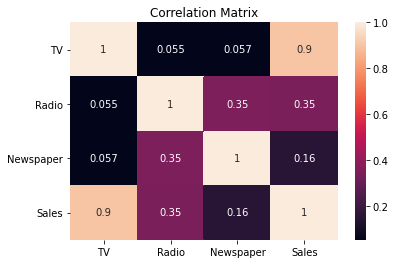

In [126]:
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

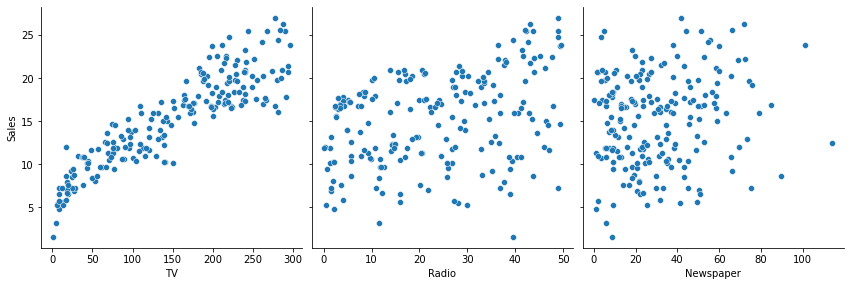

In [103]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4)

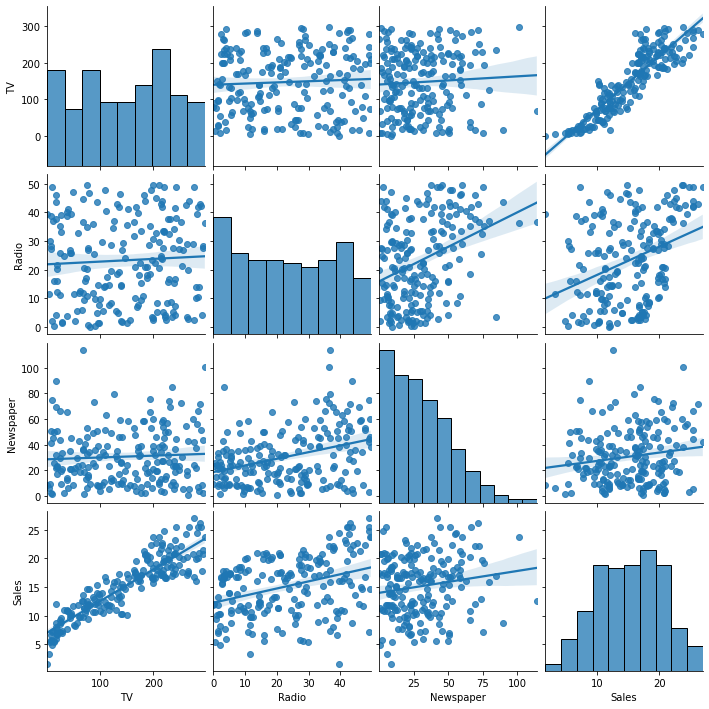

In [104]:
sns.pairplot(df, kind="reg")

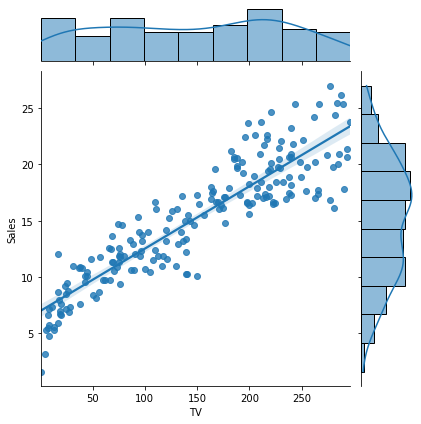

In [124]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

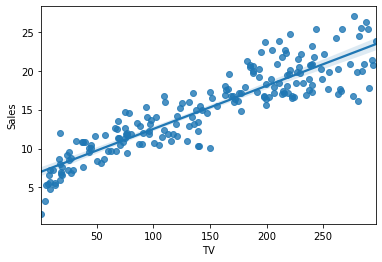

In [108]:
sns.regplot(df['TV'], df['Sales'])

# Feature Engineering

<AxesSubplot:xlabel='Sales', ylabel='Density'>

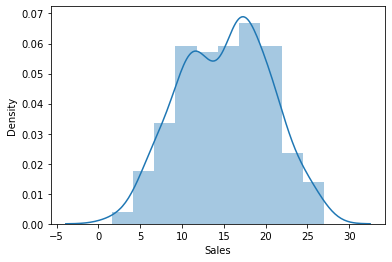

In [109]:
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

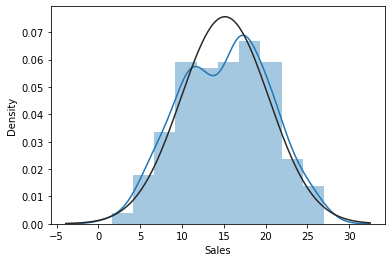

In [110]:
sns.distplot(df['Sales'], fit=stats.norm)

In [113]:
X=df.drop('Sales', axis=1)
Y=df[['Sales']]

# Model

In [114]:
def model(X, Y, algo, split_share=0.33):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=split_share, random_state=42)
    m=algo.fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, m.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, m.predict(X_test)))
    return type(m).__name__, train_rmse, test_rmse

In [115]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet()]
results={'model':[], 'train_rmse':[], 'test_rmse':[]}

In [116]:
for i in models:
    res=model(X, Y, i)
    results['model'].append(res[0])
    results['train_rmse'].append(res[1])
    results['test_rmse'].append(res[2])

In [117]:
results=pd.DataFrame(results)
results

,model,train_rmse,test_rmse
0,LinearRegression,1.665381,1.650111
1,Lasso,1.667007,1.650826
2,Ridge,1.665381,1.650120
3,ElasticNet,1.665851,1.650647


<AxesSubplot:ylabel='model'>

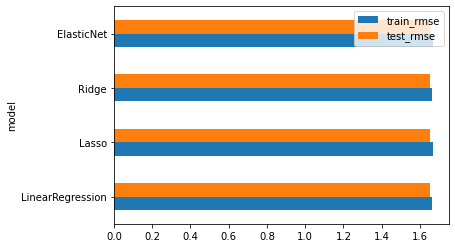

In [118]:
results.set_index('model').plot(kind='barh')

# Model Tuning

In [119]:
def model_tuning(X, Y, algo, algocv, alphas, split_share=0.33):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=split_share, random_state=42)
    algo_cv=algocv(alphas=alphas, cv=10, normalize=True)
    algo_cv.fit(X_train, Y_train)
    algo_tuned=algo(alpha=algo_cv.alpha_)
    algo_tuned.fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, algo_tuned.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, algo_tuned.predict(X_test)))
    return type(algo()).__name__, train_rmse, test_rmse

In [120]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
alphas=10**np.linspace(10, -2, 100)*0.5
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}

In [121]:
for model in models.keys():
    res=model_tuning(X, Y, model, models[model], alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

In [122]:
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,model,train_rmse,test_rmse
0,Ridge,1.665381,0.903154
1,Lasso,1.665381,0.903155
2,ElasticNet,1.665381,0.903154


<AxesSubplot:ylabel='model'>

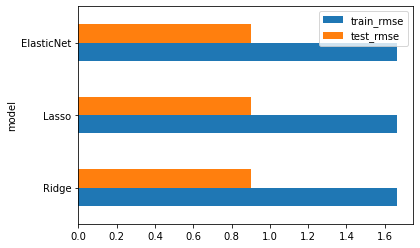

In [123]:
results_tuned.set_index('model').plot(kind='barh')